In [13]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
import run_all_exp
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

from emulator_utils import brewer2_light

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def plot_box(experiments, scenarios, T_out, regions, save=False, fig_name=None):
  n_exp, n_scen, n_boxes = len(experiments), len(scenarios), len(regions)
  fig, ax = plt.subplots(n_exp, n_scen, figsize=(4*n_scen,4*n_exp), constrained_layout=True, sharex='col', sharey='row')

  for i, exp in enumerate(experiments):
    T_out_temp = T_out[exp]
    if i == 1:
      regions = ['Atmosphere','Ocean']

    for j, scen in enumerate(scenarios):
      T_true_temp = T_out_temp[scen].T
      n_boxes = T_true_temp.shape[1]
      for k in range(n_boxes):
        ax[i,j].plot(T_true_temp[:,k], lw=3, c=brewer2_light(k), label = regions[k])

      if j == 0:
        ax[i,j].legend(fontsize=20)
        ax[i,j].set_ylabel(r'Temperature [$^\circ$C]',fontsize=22)

      if i == n_exp - 1:
        ax[i,j].set_xlabel('Year',fontsize=24)

          # Add scenario names as row labels (test)
      if i == 0:
        if scen == 'Abrupt':
          title = r'\textit{Abrupt}'
        elif scen == 'High Emissions':
          title = r'\textit{High Emissions}'
        elif scen == 'Mid. Emissions':
          title = r'\textit{Mid. Emissions}'
        elif scen == 'Overshoot':
          title = r'\textit{Overshoot}'
        ax[i,j].set_title(title, fontsize=24, va="center")

      ax[i,j].tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

In [51]:
def plot_experiments(experiments, scenarios, T_out, regions, save=False, fig_name=None):
  n_exp, n_scen, n_boxes = len(experiments), len(scenarios), len(regions)
  fig, ax = plt.subplots(n_exp, n_scen, figsize=(5*n_scen,5*n_exp), constrained_layout=True, sharex='col', sharey='row')
  regions_in = regions

  for i, scen in enumerate(scenarios):
    for j, exp in enumerate(experiments):
      if j == 2:
        regions = ['Atmosphere','Ocean']
      else:
        regions = regions_in

      T_true_temp = T_out[exp][scen].T
      n_boxes = T_true_temp.shape[1]

      for k in range(n_boxes):
        ax[i,j].plot(T_true_temp[:,k], lw=3, c=brewer2_light(k), label = regions[k])

      if i == 0:
        ax[i,j].legend(fontsize=20, loc='lower right')

      if j == 0:
        ax[i,j].set_ylabel(r'Temperature [$^\circ$C]',fontsize=22)

      if i == n_exp - 1:
        ax[i,j].set_xlabel('Year',fontsize=24)

      # Add scenario names as row labels (test)
      if j == 1:
        #for j, test_name in enumerate(scenarios):
        if scen == '2xCO2':
          title = r'\textit{Abrupt}: $F(t) = F_{2\times}$'
        elif scen == 'High Emissions':
          title = r'\textit{High Emissions}: $F(t) = F_e \exp{(t/\tau_e)}$'
        elif scen == 'Overshoot':
          title = r'\textit{Overshoot}: $F(t) = F_o \exp{(-(t - t_o)^2/(2\sigma^2))}$'
        ax[i,j].set_title(title, fontsize=24, va="center", pad=20)

      ax[i,j].tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

### Run and plot all experiment

In [20]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 3

# Initialize forcing vectors and run scenarios
experiments = ['3box_coup','2box_coup']
scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']
regions = ['High Lat. Ocean','Land','Low Lat. Ocean']
full_outputs, T_out, forcings = {}, {}, {}
for i, exp in enumerate(experiments):
  T_out[exp], forcings[exp] = {}, {}

  #n_boxes = run_all_exp.get_num_boxes(i)
  if exp == '2box_coup':
    n_boxes = 2

  # Horizontally coupled vs. not
  if i == 0:
    diff_flag = 1
  else:
    diff_flag = 0

  # Vertically coupled vs not
  if i == 1:
    vert_diff_flag = 1
  else:
    vert_diff_flag = 0
  for j, scen in enumerate(scenarios):
    full_outputs[scen] = BudykoSellers.Run_Budyko_Sellers(scen_flag=j, n_boxes=n_boxes, diff_flag=diff_flag, vert_diff_flag=vert_diff_flag)
    forcings[exp][scen] = np.tile(full_outputs[scen]['forcing_ts'], (n_boxes, 1))
    T_out[exp][scen] = np.squeeze(full_outputs[scen]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:330: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


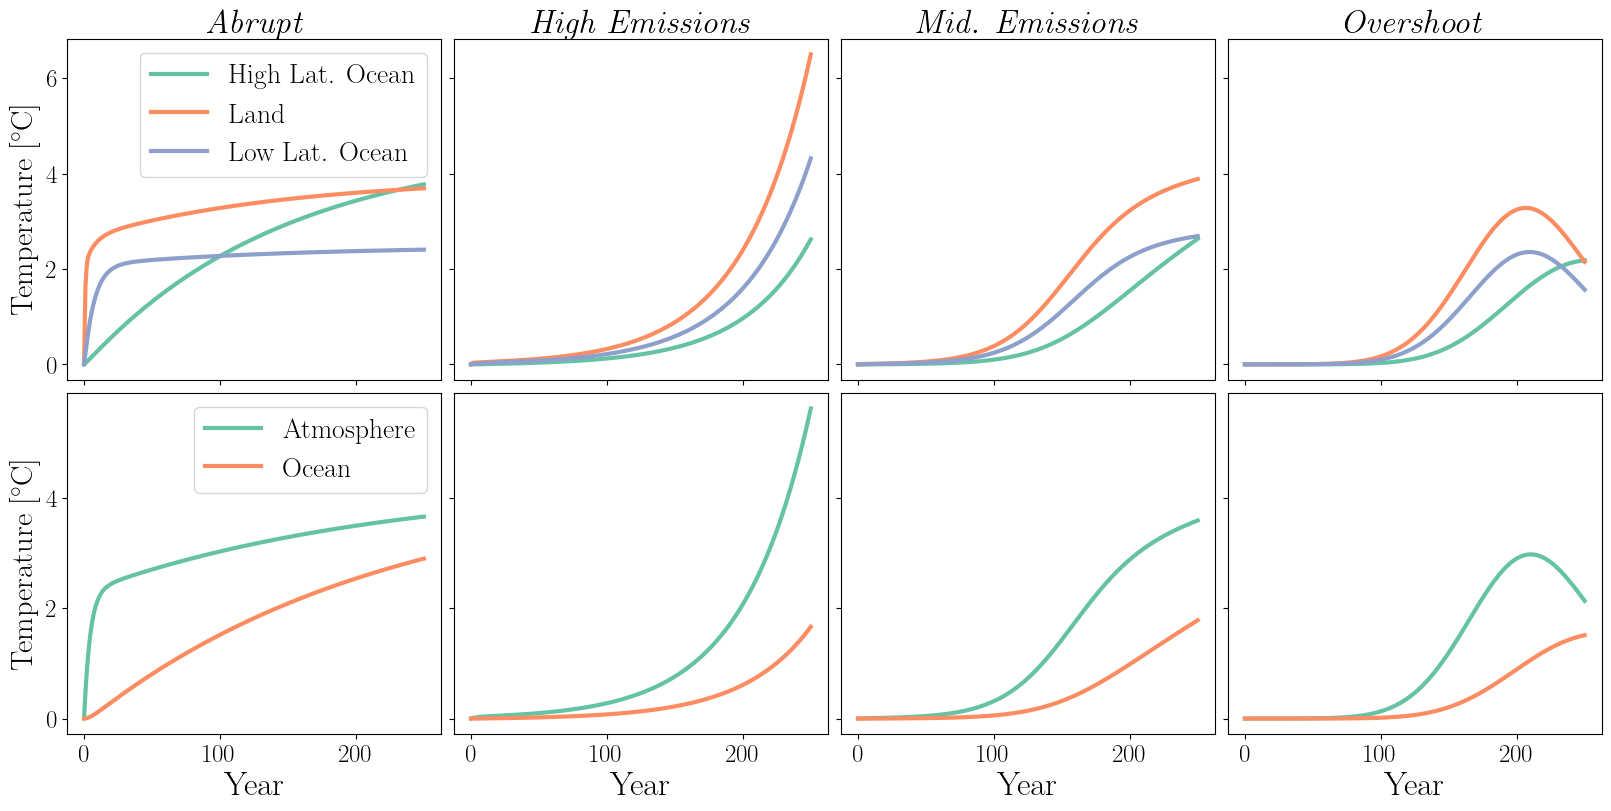

In [17]:
plot_box(experiments, scenarios, T_out, regions, save=True, fig_name='expBoxes_scens_v1')

In [127]:
def Lorenz_plot(scenarios, Z_mean, Z_std, t_vec, offset, T, save=False, fig_name=None):
  fig, ax = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, sharey=True)

  for i, scen in enumerate(scenarios):
    ax[i].plot(t_vec, Z_mean[scen], c=brewer2_light(0), lw=2, label='Mean')
    ax[i].fill_between(t_vec, Z_mean[scen] - Z_std[scen], Z_mean[scen] + Z_std[scen], alpha=0.5, color=brewer2_light(0), label=r'$\sigma$')

    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax[i].set_xlabel('Time',fontsize=20)

    if scen == '2xCO2':
      title = r'\textit{Abrupt}'
    elif scen == 'High Emissions':
      title = r'\textit{High Emissions}'
    elif scen == 'Overshoot':
      title = r'\textit{Overshoot}'
    ax[i].set_title(title, fontsize=24, va="center")

  ax[0].legend(fontsize=20)
  ax[0].set_ylabel(r'$Z$',fontsize=24)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

In [124]:
# Required variables
alpha = 1./1000.
beta = 8.0/3.0
sigma = 10.

# Time variables
dt = 1.0 / 8
t_max = 250
t_vec = np.arange(0, t_max + dt, dt)

r = 10.0 * dt
N = 100

T = 1
omega = 1./T
offset = 50

scenarios = ['2xCO2','High Emissions','Overshoot']

x_snap, y_snap, z_snap, z_mean, z_max, z_std, rho = {}, {}, {}, {}, {}, {}, {}
for i, scen in enumerate(scenarios):
  x_snap[scen], y_snap[scen], z_snap[scen], z_mean[scen], z_max[scen], z_std[scen], rho[scen] = emulator_utils.Lorenz_integrate(t_max, dt, N, r, alpha, beta, sigma, omega, offset, exp=i)

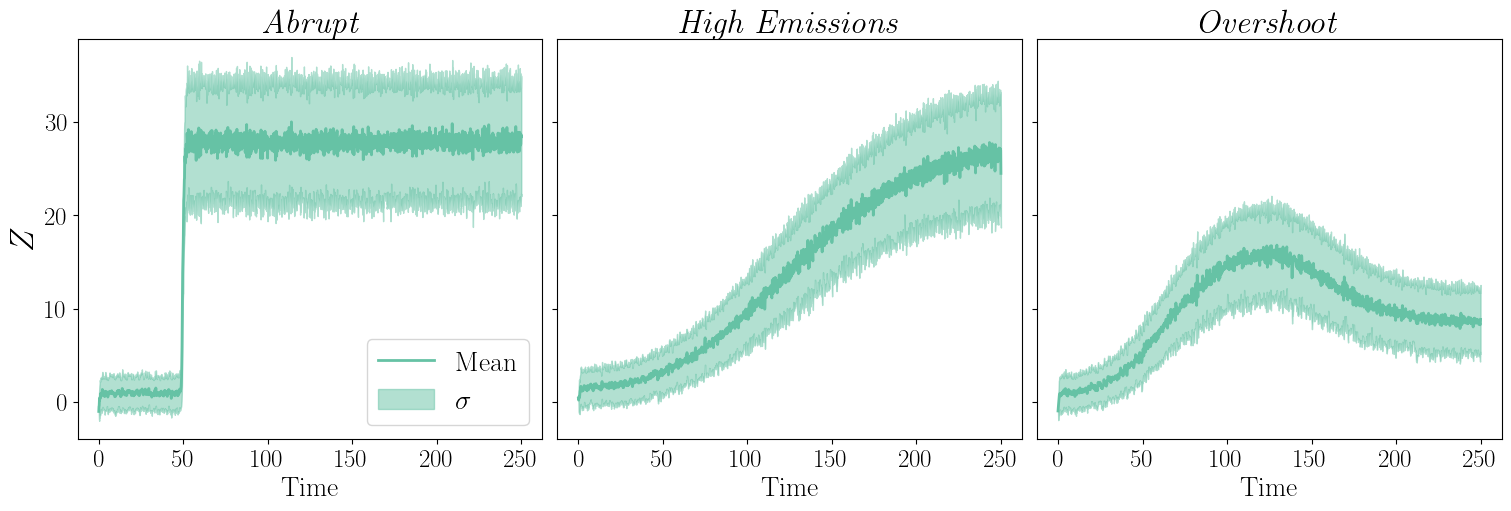

In [129]:
Lorenz_plot(scenarios, z_mean, z_std, t_vec, offset, T, save=True, fig_name='expLorenz_scens_v1')

In [22]:
dt = 1
exp = '3box_coup'
n_boxes = 3
operator_direct, T_pred_direct, error_metrics_direct = emulator_utils.emulate_scenarios('direct', scenarios=scenarios, outputs=T_out[exp], forcings=forcings[exp], n_boxes=n_boxes, dt=dt, diff_flag=1)

Train: Impulse Forcing - L2 Error


/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:330: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


In [31]:
def plot_response(G, regions, save=False, fig_name=None):
  fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True, sharex='col', sharey='row')
  n_boxes = len(regions)
  for k in range(n_boxes):
    ax.plot(G[k,0:50], lw=3, c=brewer2_light(k), label = regions[k])

  ax.legend(fontsize=20)
  ax.set_ylabel(r'Response [$^\circ$C/(Wm$^{-2}$)]',fontsize=22)
  ax.set_xlabel('Year',fontsize=24)
  ax.tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return